<a href="https://colab.research.google.com/github/2100030074/Fashion-MINST-Python-base/blob/main/Fashion_mnist_pro_in_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing Tensorflow 2.x
import tensorflow as tf
print("We are using the Tensorflow Version {}".format(tf.__version__))

We are using the Tensorflow Version 2.15.0


In [ ]:
#importing required packages

# TensorFLow Tools
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Processing and Visualization Tools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import datetime

In [ ]:
#importing the Fashion MNIST dataset from keras
from tensorflow.keras.datasets import fashion_mnist as dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (60000, 28, 28)
The shape of the y_train is (60000,)
The shape of the X_test is (10000, 28, 28)
The shape of the y_test is (10000,)


The First Image has the label 9


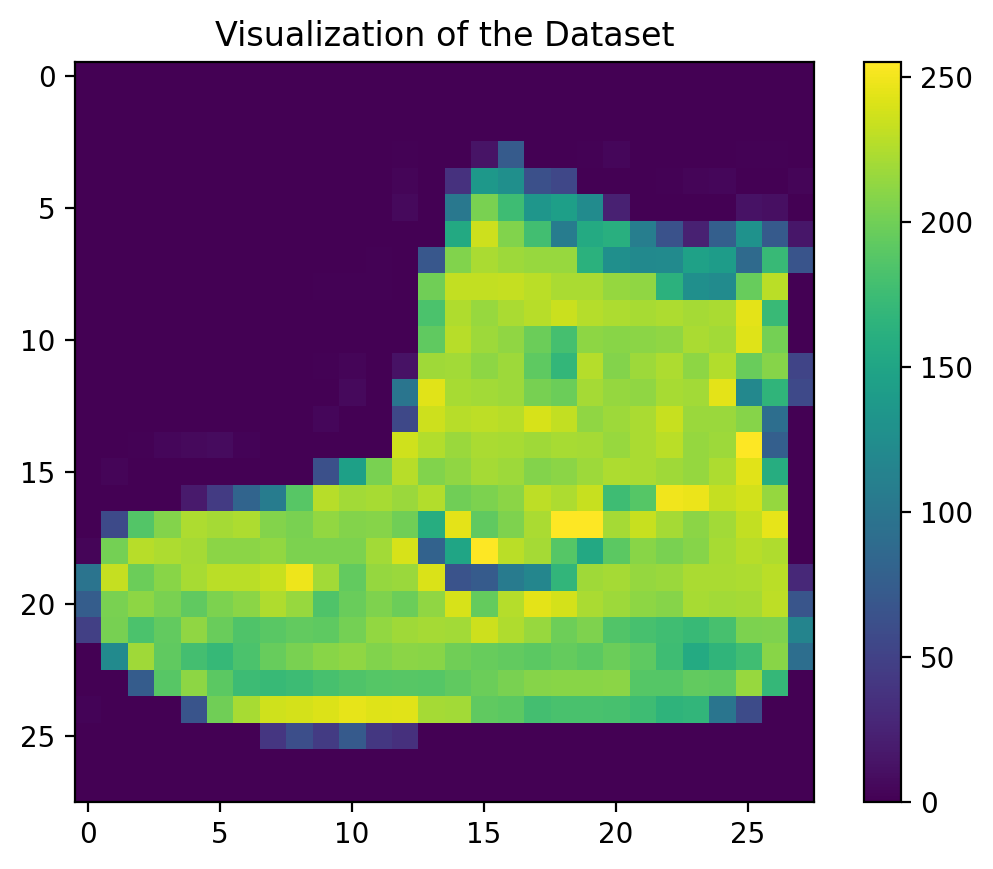

In [ ]:
#Let's have a look at the first image from our X_train and the
# corresponding label from y_train
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [ ]:
#Normalizing the train and test image data
X_train = X_train/255.0
X_test = X_test/ 255.0

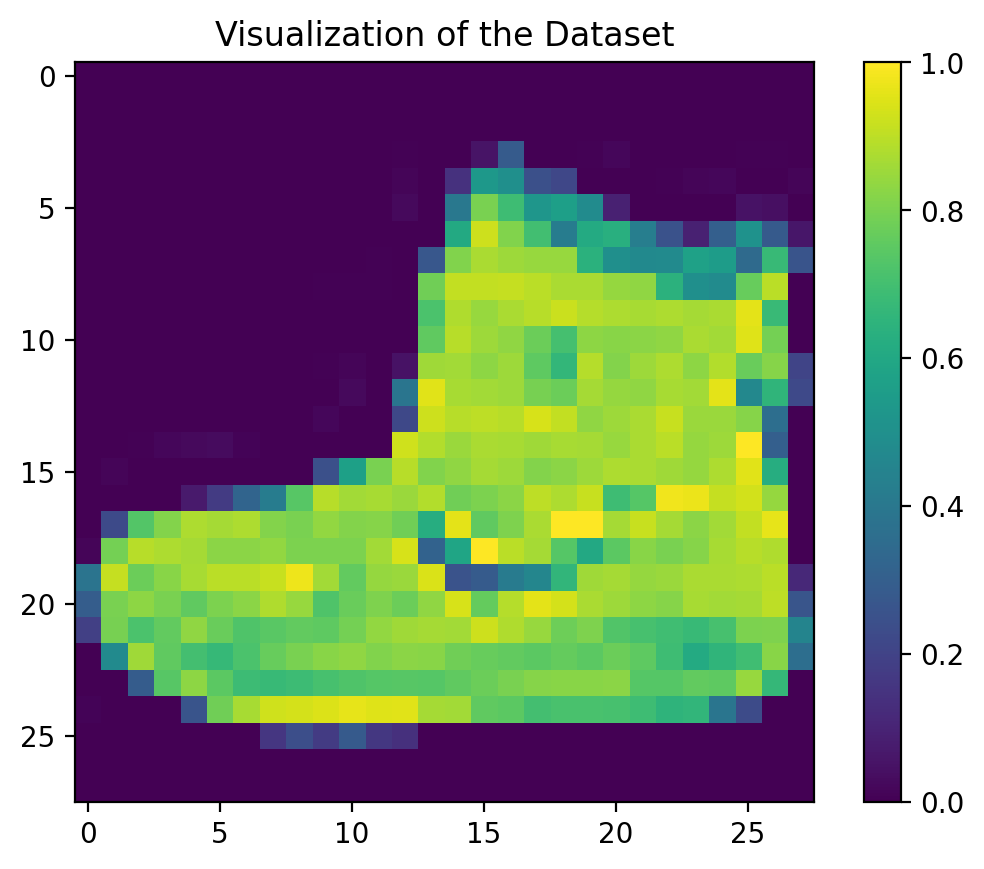

In [ ]:
#Let's again have a look at the first image from our X_train and
#see if we have successfully normalized the datasets
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [ ]:
#Splitting the training fdataset into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [ ]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (48000, 28, 28)
The shape of the y_train is (48000,)
The shape of the X_valid is (12000, 28, 28)
The shape of the y_valid is (12000,)


In [ ]:
#Before proceeding, we need to reshape our images in the dataset
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [ ]:
#Let's now have a look at the shapes
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the X_test is {}".format(X_test.shape))

The shape of the X_train is (48000, 28, 28, 1)
The shape of the X_valid is (12000, 28, 28, 1)
The shape of the X_test is (10000, 28, 28, 1)


In [ ]:
#Let's define our CNN model

CNN_model = Sequential([
                        #First Convolution Layer
                        Conv2D(filters=32,kernel_size=(3,3),
                               activation=tf.keras.layers.LeakyReLU(alpha=0.01),
                               kernel_initializer='he_normal',
                               input_shape=(28,28,1)),

                        MaxPool2D(pool_size=(2,2)),
                        Dropout(0.5),

                        #Second Convolution Layer
                        Conv2D(filters=64,kernel_size=(3,3),
                               kernel_initializer='he_normal',
                               activation=tf.keras.layers.LeakyReLU(alpha=0.01)),

                        MaxPool2D(pool_size=(2,2)),
                        Dropout(0.4),

                        #Third Convolution Layer
                        Conv2D(filters=128,kernel_size=(3,3),
                               kernel_initializer='he_normal',
                               activation=tf.keras.layers.LeakyReLU(alpha=0.01)),

                        MaxPool2D(pool_size=(2,2)),


                        #Flattening the output from last conv layer
                        Flatten(),

                        #Using Feed Forward NN as final layers for Classification
                        #Feed Forward Layer 1
                        Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.001)),

                        #Feed Forward Layer 2
                        Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.001)),

                        #Feed Forward Layer 3
                        Dense(32, activation='relu'),

                        #Output Layer
                        Dense(10, 'softmax')
])

In [ ]:
#Let's compile our CNN model
loss_function = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.001
CNN_model.compile(
    loss = loss_function,
    optimizer = Adam(lr=LEARNING_RATE),
    metrics = ["accuracy"]
)

In [ ]:
#Load the TensorBoard Notebook extension
%load_ext tensorboard

In [ ]:
# Create the "logdir" for visualizing the Data
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

#Get the TensorBoard instance
#We will use this instance during the training process
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
history = CNN_model.fit(x=X_train,
            y=y_train,
            epochs=100,
            validation_data=(X_valid, y_valid),
            callbacks=[tensorboard_callback])

Epoch 1/100
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2409 - accuracy: 0.9100 - val_loss: 0.2714 - val_accuracy: 0.9033
Epoch 2/100
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2421 - accuracy: 0.9084 - val_loss: 0.2996 - val_accuracy: 0.8909
Epoch 3/100
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2388 - accuracy: 0.9106 - val_loss: 0.2655 - val_accuracy: 0.9064
Epoch 4/100
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2351 - accuracy: 0.9122 - val_loss: 0.2906 - val_accuracy: 0.8980
Epoch 5/100
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2419 - accuracy: 0.9096 - val_loss: 0.2848 - val_accuracy: 0.9032
Epoch 6/100
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2418 - accuracy: 0.9094 - val_loss: 0.2830 - val_accuracy: 0.8994
Epoch 7/100
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2418 - accuracy: 0.9097 - val_loss: 0

In [ ]:
score = CNN_model.evaluate(x=X_test, y=y_test, verbose=0)

In [ ]:
print("The loss on the test set is {}".format(score[0]))
print("The accuracy on the test set is {}".format(score[1]))

The loss on the test set is 0.3114471435546875
The accuracy on the test set is 0.8970000147819519


In [ ]:
#Saving the model
CNN_model.save('/content/sample_data/Model')

#Saving the weights
CNN_model.save_weights('/content/sample_data/ModelWeights')